In [1]:
from fit_modelSignal import *
from fit_modelControl import *
from scipy.optimize import minimize
import numdifftools as nd

from utility_commonPlot import *

from timeit import default_timer as timer

In [12]:
baseDir = common.getBaseDirectory()
shaping = True

if shaping:
    X0 = np.load(baseDir + "data/templates/shaping_signalRegion/X_.npy")
    X1 = np.load(baseDir + "data/templates/shaping_controlRegion/X_.npy")
else:
    X0 = np.load(baseDir + "data/templates/counting_signalRegion/X_.npy")
    X1 = np.load(baseDir + "data/templates/counting_controlRegion/X_.npy")

    
Y0 = np.sum(X0,axis=1) + 0.1
Y1 = np.sum(X1,axis=1) + 0.1

model0 = PredictiveModel_Signal (X0,shaping)
model1 = PredictiveModel_Control(X1,shaping)


# define Model

In [23]:
def loss (param):
    y0 = model0.predict(param)
    y1 = model1.predict(param)
    loss  = np.sum( (y0-Y0)**2/(2*Y0) )
    loss += np.sum( (y1-Y1)**2/(2*Y1) )
    loss += np.sum( (param[3:]**2)/2  )
    return loss

param0 = np.array([0.107,0.108,0.1090] + [0.0]*22)
start = timer()
result = minimize( loss, param0, method='SLSQP', bounds = [(0,1)]*3 + [(-1,1)]*22 )
end   = timer()
print(result.x[:3])

print('fitting time = {:6.4f} ms'.format( (end-start)*1000 ))

[0.10800915 0.10800741 0.10802766]
fitting time = 769.1850 ms


hessian time = 1578.8836 ms


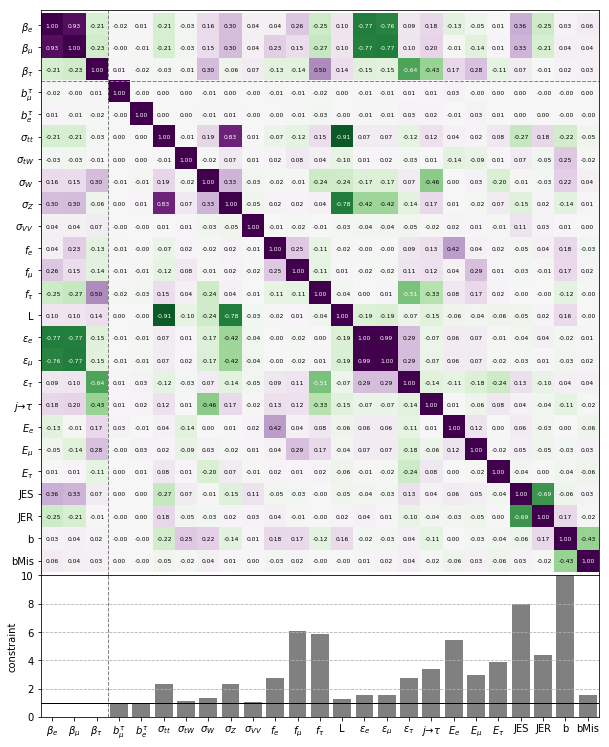

In [24]:
start = timer()
hcalc = nd.Hessian(loss, step=1e-4, method='central')
hess  = hcalc( result.x )
end   = timer()
hessinv = np.linalg.inv(hess)
sig   = np.sqrt(hessinv.diagonal())
cor  = hessinv/np.outer(sig, sig)

print('hessian time = {:6.4f} ms'.format( (end-start)*1000 ))
commonp.showParameterCovMat(cor,sig)
plt.savefig('../plots/fit/cov_woshape_wocontrol.png',dpi=300)

In [6]:
for i in range(sig.size):
    c,s = result.x[i], sig[i]
    print('{:7.4f} +/- {:6.4f}'.format(c,s))

 0.1080 +/- 0.0003
 0.1080 +/- 0.0003
 0.1080 +/- 0.0012
-0.0000 +/- 0.1000
-0.0000 +/- 0.1000
 0.0000 +/- 0.0805
-0.0000 +/- 0.1000
-0.0000 +/- 0.0999
 0.0000 +/- 0.0990
 0.0000 +/- 0.1000
 0.0000 +/- 0.0988
-0.0000 +/- 0.0967
-0.0000 +/- 0.0999
 0.0000 +/- 0.0945
 0.0000 +/- 0.0999
 0.0000 +/- 0.0998
-0.0000 +/- 0.0995
-0.0000 +/- 0.0995
-0.0000 +/- 0.0992
 0.0000 +/- 0.0998
-0.0000 +/- 0.0999
-0.0000 +/- 0.0760
-0.0000 +/- 0.0998
-0.0000 +/- 0.0208
-0.0000 +/- 0.0999


In [22]:
print(sig[0:3]/0.1080*100)
print(1/sig[3:])

[0.27707713 0.26411876 0.86165063]
[10.00021679 10.00050355 14.67852828 10.01898639 10.1651836  16.33593446
 10.00681247 10.43518066 12.11918896 14.50668546 11.18392995 12.46899193
 12.57985852 10.77537607 11.4823779  11.77497717 10.45673663 10.82732933
 18.1634145  11.3984438  48.02024584 10.07918691]
